  <h1 align = "center" > Language Translation using Neural Networks</h1>



In [631]:
#Reading and preprocessing
import pandas as pd
import numpy as np

![alt english-tamil](https://media.giphy.com/media/l0MYSYqm4Z2hVLR4Y/giphy.gif)


In [632]:
f = open('Tamil.txt', 'r+', encoding="utf8")
x = f.readlines()

In [633]:
f = open('English.txt', 'r+', encoding="utf8")
y = f.readlines()

### I am using only 1000 examples to train pretty fast (I'm lazy FYI)

In [634]:
x = x[-1000:]

In [635]:
len(x)

1000

In [636]:
y = y[-1000:]

### Text Pre-processing

In [637]:
x[0]= x[0].strip('\ufeffMMA')
y[0]= y[0].strip('\ufeffMMA')

In [638]:
import string
exclude = set(string.punctuation)
for i in range(0,len(x)):
    x[i] = x[i].strip('\n')
    x[i] = ''.join(ch for ch in x[i] if ch not in exclude)

In [639]:
for i in range(0,len(y)):
    y[i] = y[i].lower()
    y[i] = y[i].strip('\n')
    y[i] = ''.join(ch for ch in y[i] if ch not in exclude)

### Cleaned text

In [640]:
print("Tamil Text:",x[1],"\n")
print("English Text:",y[1])

Tamil Text: ஒரு நாட்டுப்புற மூச்சுவிடா பூசணிக்காய் பேசும் விதத்தில் மேர்க்கெல் சுருக்கமாக தன்னுடைய கிழக்கு ஜேர்மனித் தோற்றம் பற்றி குறிப்பிட்டு 20 ஆண்டுகளுக்கு முன்பு என்னுடைய தீவிர கற்பனைக் கனவுகளில்கூட அமெரிக்காவிற்கு பயணித்து காங்கிரஸில் உரையாற்றுவோம் என எதிர்பார்த்திருக்க முடியாது என்றார் 

English Text: in the manner of a breathless provincial bumpkin merkel briefly referred to her origins in former east germany and declared that 20 years ago she would never ‘‘in my wildest dreams have expected to travel to america and address congress


In [641]:
len(x)

1000

In [642]:
len(y)

1000

In [643]:
english_words = []
for i in range(0,len(y)):
    english_words.append(y[i].split())   

In [644]:
english_words = [j for sub in english_words for j in sub]

In [645]:
print("Number of Unique English words:",len(set(english_words)))

Number of Unique English words: 5520


In [646]:
tamil_words = []
for i in range(0,len(x)):
    tamil_words.append(x[i].split())  
tamil_words = [j for sub in tamil_words for j in sub]

In [647]:
print("Number of Unique Tamil words:",len(set(tamil_words)))

Number of Unique Tamil words: 9413


In [648]:
tamilvocab = len(set(tamil_words))
engvocab = len(set(english_words))

### Looks like there are more number of unique words in Tamil.....as expected

In [649]:
length_tamil=[]
for i in range(0,len(x)):
    length_tamil.append(len(x[i].split()))

In [650]:
length_english=[]
for i in range(0,len(y)):
    length_english.append(len(y[i].split()))

### Average number of words in each sentence

In [651]:
sum(length_english)/len(length_english)

23.58

In [652]:
sum(length_tamil)/len(length_tamil)

16.242

In [653]:
print(max(length_english))
print(max(length_tamil))

74
54


In [654]:
import collections
english_words_counter = collections.Counter([word for sentence in y for word in sentence.split()])
tamil_words_counter = collections.Counter([word for sentence in x for word in sentence.split()])

### Most common words in both languages

In [655]:
english_words_counter.most_common(10)

[('the', 1947),
 ('of', 880),
 ('and', 841),
 ('to', 659),
 ('in', 582),
 ('a', 412),
 ('that', 287),
 ('is', 276),
 ('for', 222),
 ('on', 180)]

In [656]:
tamil_words_counter.most_common(10)

[('ஒரு', 165),
 ('மற்றும்', 143),
 ('என்று', 126),
 ('இந்த', 79),
 ('என்ற', 70),
 ('அவர்', 68),
 ('அவர்கள்', 53),
 ('அது', 52),
 ('என', 49),
 ('அரசியல்', 47)]

# Tokenizer:

Now that our corpus is ready we have to represent it in a way that the neural network can understand, So we convert the text representation to number representation. In words based representation each word his assigned a number abd in character based representation each character is assigned a number. I am using a word level model for its simpler complexity

Keras Tokenizer simplifies the representation process for us (This class allows to vectorize a text corpus, by turning each text into either a sequence of integers)


###  Setting gpu use to 0.3 as maximum gpu usage by CUDA results in internal error 

In [657]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

In [658]:
from keras.preprocessing.text import Tokenizer
def tokenize(x):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x) 
    return tokenizer.texts_to_sequences(x), tokenizer

In [659]:
x[0]

'அவன் தண்ணீரண்டையிலே நாட்டப்பட்டதும் கால்வாய் ஓரமாகத்தன்வேர்களை விடுகிறதும் உஷ்ணம் வருகிறதைக் காணாமல் இலை பச்சையாயிருக்கிறதும் மழைத்தாழ்ச்சியான வருஷத்திலும் வருத்தமின்றித் தப்பாமல் கனிகொடுக்கிறதுமான மரத்தைப்போலிருப்பான்'

In [660]:
z=(tokenize(x))
z[0][1]

[1,
 1982,
 1983,
 1984,
 960,
 605,
 961,
 962,
 33,
 216,
 1985,
 963,
 18,
 964,
 328,
 217,
 218,
 965,
 606,
 1986,
 1987,
 607,
 1988,
 1989,
 1990,
 9,
 1991,
 88,
 48]

In [661]:
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',]
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

{'the': 1, 'quick': 2, 'brown': 3, 'fox': 4, 'jumps': 5, 'over': 6, 'lazy': 7, 'dog': 8, 'by': 9, 'jove': 10, 'my': 11, 'study': 12, 'of': 13, 'lexicography': 14, 'won': 15, 'a': 16, 'prize': 17}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 3, 4, 5, 6, 1, 7, 8]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [9, 10, 11, 2, 12, 13, 14, 15, 16, 17]


# Padding:

When batching the sequence of word ids together, each sequence needs to be the same length. Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.




In [662]:
from keras.preprocessing.sequence import pad_sequences
def pad(x, length=None):
    return pad_sequences(x, maxlen=length, padding='post')

![alt padding](https://media.giphy.com/media/5QMOHnyNUgRtWfKirc/giphy.gif)

In [663]:
test_pad = pad(text_tokenized)
print("OUTPUT IS ALWAYS A LENGTH 10 ARRAY....FILLED BY 0s IN THE END")
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

OUTPUT IS ALWAYS A LENGTH 10 ARRAY....FILLED BY 0s IN THE END
Sequence 1 in x
  Input:  [1 2 3 4 5 6 1 7 8]
  Output: [1 2 3 4 5 6 1 7 8 0]
Sequence 2 in x
  Input:  [ 9 10 11  2 12 13 14 15 16 17]
  Output: [ 9 10 11  2 12 13 14 15 16 17]


### Apply all the tested preprocessing functions to our corpus

In [664]:
def preprocess(x, y):
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    print('shape before: ', preprocess_y.shape)
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)
    print('shape after: ', preprocess_y.shape)
        
    return preprocess_x, preprocess_y, x_tk, y_tk

In [665]:
preprocess_x, x_tk = tokenize(x)
preprocess_x = pad(preprocess_x)
preprocess_x.shape

(1000, 54)

In [666]:
preproc_tamil_sentences, preproc_english_sentences, tamil_tokenizer, english_tokenizer =\
    preprocess(x, y)

shape before:  (1000, 74)
shape after:  (1000, 74, 1)


## Assigning a number to each word

In [667]:
list(tamil_tokenizer.word_index.items())[:5]

[('ஒரு', 1), ('மற்றும்', 2), ('என்று', 3), ('இந்த', 4), ('என்ற', 5)]

In [668]:
list(english_tokenizer.word_index.items())[:5]

[('the', 1), ('of', 2), ('and', 3), ('to', 4), ('in', 5)]

# Logits to text

The neural network will be translating the input to words ids, which isn't the final form we want. We want the Tamil translation. The function logits_to_text will bridge the gab between the logits from the neural network to the Tamil translation.



In [669]:
def logits_to_text(logits, tokenizer):

    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

In [670]:
import os
from keras.models import load_model
import numpy as np

In [671]:
print("tamil_sentences shape: ", preproc_english_sentences.shape)
print("english_sentences  shape: ", preproc_tamil_sentences.shape)
print('output sequence length: ', preproc_english_sentences.shape[1])

tamil_sentences shape:  (1000, 74, 1)
english_sentences  shape:  (1000, 54)
output sequence length:  74


In [672]:
tmp_x = pad(preproc_tamil_sentences, preproc_english_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_english_sentences.shape[-2], 1))

In [673]:
tmp_x.shape

(1000, 74, 1)

In [674]:
from keras.layers import GRU, Input, Dense, TimeDistributed
from keras.models import Model, Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy


def simple_model(input_shape, output_sequence_length, tamil_vocab_size, english_vocab_size, learning_rate=0.1):
    model = Sequential()
    model.add(GRU(128, dropout=0.1,input_shape=input_shape[1:], return_sequences=True) )
    model.add(TimeDistributed(Dense(english_vocab_size, activation='softmax') ))
    print('######## Summary ###########')
    model.summary()
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

 <h2 align = "center"> Let the Training Begin </h2>



![alt training](https://media.giphy.com/media/3oriOgivJPodK8Qg9O/giphy.gif)


In [675]:
simple_rnn_model = simple_model(
    tmp_x.shape,
    preproc_english_sentences.shape[1],
    engvocab+1,
    tamilvocab+1)

###########LOAD MODEL IF IT EXISTS OR ELSE TRAIN THE MODEL################

if os.path.exists(os.path.join("model", "translation.h5"))== False:
    rnn = simple_rnn_model.fit(tmp_x, preproc_english_sentences, batch_size=100, epochs=20, validation_split=0.2)
else:
    simple_rnn_model = load_model(os.path.join("model", "translation.h5"))

######## Summary ###########
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_17 (GRU)                 (None, 74, 128)           49920     
_________________________________________________________________
time_distributed_15 (TimeDis (None, 74, 9414)          1214406   
Total params: 1,264,326
Trainable params: 1,264,326
Non-trainable params: 0
_________________________________________________________________


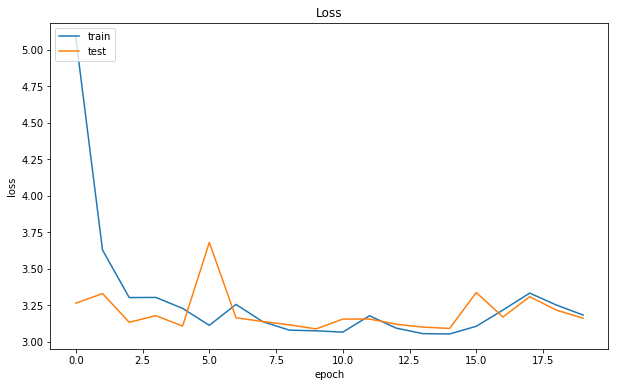

In [676]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(rnn.history['loss'])
plt.plot(rnn.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Looks like there is no overfitting....

![alt nice](https://media.giphy.com/media/yJFeycRK2DB4c/giphy.gif)

## Save the model 

In [677]:
simple_rnn_model.save(os.path.join("model", "translation.h5"))

In [678]:
## Save the model so that you can load it later 

In [679]:
score = simple_rnn_model.evaluate(tmp_x, preproc_english_sentences, verbose=0)
print("Train accurancy: ", score[1])

Train accurancy:  0.6980270261764526


In [680]:
score

[3.098744831085205, 0.6980270261764526]

### Pretty decent for a small dataset

In [681]:
x[15]

'விடுதலைப் பிரகடனம் போரின் இராணுவத் தேவைகளை ஒட்டி ஏற்பட்டது'

In [682]:
## PRETTY BAD TRANSLATION :(
print(logits_to_text(simple_rnn_model.predict(tmp_x[:100])[15], english_tokenizer))

the the the the the the the <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### "The" is being predicted for all words as it is the most common word....This is not ideal

## So let us now try LSTM and include an embedding layer 

In [683]:
from keras.layers.embeddings import Embedding
from keras.layers import LSTM

def embed_model(input_shape, output_sequence_length, tamil_vocab_size, english_vocab_size, learning_rate=0.1):
    model = Sequential()
    model.add(Embedding(max(tamil_vocab_size, english_vocab_size) ,128 , input_length=output_sequence_length))
    model.add(LSTM(128, dropout=0.1, return_sequences=True))
    model.add(Dense(english_vocab_size, activation='softmax'))
    model.summary()
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    
    return model

In [684]:
#reshaping the input for processing embeddings
tmp_x = pad(preproc_tamil_sentences, preproc_english_sentences.shape[1])

In [685]:
tmp_x.shape

(1000, 74)

In [686]:
embed_rnn_model = embed_model(
    tmp_x.shape,
    preproc_english_sentences.shape[1],
    len(tamil_tokenizer.word_index)+1,
    len(english_tokenizer.word_index)+1)
if os.path.exists(os.path.join("cache", "LSTM.h5"))== False:
    embedrnn = embed_rnn_model.fit(tmp_x, preproc_english_sentences, batch_size=100, epochs=20, validation_split=0.2)
else:
    embed_rnn_model = load_model(os.path.join("cache", "LSTM.h5"))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 74, 128)           1204736   
_________________________________________________________________
lstm_6 (LSTM)                (None, 74, 128)           131584    
_________________________________________________________________
dense_20 (Dense)             (None, 74, 5520)          712080    
Total params: 2,048,400
Trainable params: 2,048,400
Non-trainable params: 0
_________________________________________________________________
Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 14s 17ms/step - loss: 4.6253 - acc: 0.5872 - val_loss: 3.5627 - val_acc: 0.6884
Epoch 2/20
800/800 [==============================] - 10s 13ms/step - loss: 3.7050 - acc: 0.5347 - val_loss: 3.6048 - val_acc: 0.6932
Epoch 3/20
800/800 [==============================] - 10s 13ms/step - loss: 2.7167

In [687]:
embed_rnn_model.save(os.path.join("model", "LSTM.h5"))

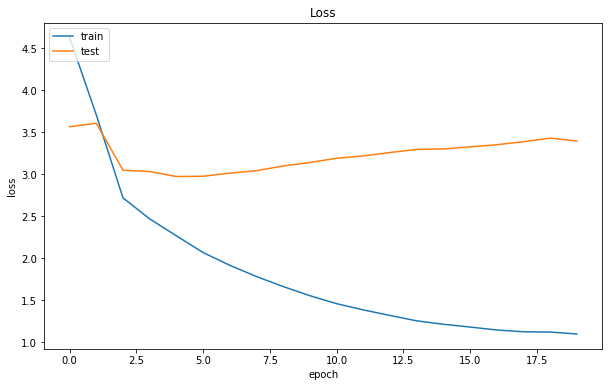

In [688]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(embedrnn.history['loss'])
plt.plot(embedrnn.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Validation loss seems to converge much faster

In [689]:
score = embed_rnn_model.evaluate(tmp_x, preproc_english_sentences, verbose=0)
print("Train accurancy: ", score[1])

Train accurancy:  0.7971756777763367


In [690]:
x[15]

'விடுதலைப் பிரகடனம் போரின் இராணுவத் தேவைகளை ஒட்டி ஏற்பட்டது'

In [691]:
print(logits_to_text(embed_rnn_model.predict(tmp_x[:16])[15], english_tokenizer))

united emancipation and strength necessitated by the 2006 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### Not perfect but atleast the stopwords stopped repeating themselves
- விடுதலைப் was correctly translated as emancipation 
- தேவைகளை was translated as necessitated  which is pretty also good

In [692]:
x[10]

'பள்ளி மாணவர்கள் மற்றும் பல்கலைக்கழக மாணவர்கள் பிரான்ஸ் நெடுகிலும் நெடுஞ்சாலைகள் வீதிகள் ஆகியவற்றை தடுப்புக்களுக்கு உட்படுத்திய வகையில் நேற்று இன்னும் கூடுதலான கைதுகள் நிகழ்த்தப்பட்டன'

In [693]:
print(logits_to_text(embed_rnn_model.predict(tmp_x[:100])[10], english_tokenizer))

further arrests stagnant reported yesterday us high school the all to blockaded roads and highways disrupting traffic across in the the the the <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### The translation is almost perfect 

-  பள்ளி மாணவர்கள் மற்றும் பல்கலைக்கழக மாணவர்கள் is translated as high school and university students
- நெடுஞ்சாலைகள் வீதிகள் ஆகியவற்றை தடுப்புக்களுக்கு உட்படுத்திய is translated as blockaded roads the highways disrupting traffic 

In [694]:
(tmp_x[:100][10]).shape

(74,)

## Let us try with our own data

In [695]:
tamil_tokenizer.word_index['அரசியல்']

10

In [696]:
a = []
t = [0] * 74
s = [0] * 74

In [697]:
t[0] = 10
a.append(t)
a.append(s)

In [698]:
a=np.array(a)

In [699]:
a[:1][0]

array([10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [700]:
print(logits_to_text(embed_rnn_model.predict(a[:1])[0], english_tokenizer))

the <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### Overfitting is at play.....The model is responding badly to new information

# Bidirectional LSTM:

One restriction of a LSTM is that it can't see the future input, only the past. This is where bidirectional recurrent neural networks come in. They are able to see the future data.



![alt bidirectionalrnn](https://media.giphy.com/media/12lCEatBs3CABW/giphy.gif)

In [701]:
from keras.layers import Bidirectional
def birnn_model(input_shape, output_sequence_length, tamil_vocab_size, english_vocab_size, learning_rate=0.1):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.1),
                        input_shape=input_shape[1:]))
    
    model.add(TimeDistributed(Dense(english_vocab_size, activation='softmax') ))
    model.summary() 
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])  
    return model

In [758]:
tmp_x = pad(preproc_tamil_sentences, preproc_english_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_english_sentences.shape[-2], 1))

In [759]:
tmp_x.shape

(1000, 74, 1)

In [704]:
bi_rnn_model = birnn_model(
    tmp_x.shape,
    preproc_english_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(tamil_tokenizer.word_index)+1)

if os.path.exists(os.path.join("model", "biRnn.h5"))== False:
    bi_rnn_model.fit(tmp_x, preproc_english_sentences, batch_size=100, epochs=20, validation_split=0.2)
else:
    bi_rnn_model = load_model(os.path.join("model", "biRnn.h5"))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 74, 256)           133120    
_________________________________________________________________
time_distributed_16 (TimeDis (None, 74, 9412)          2418884   
Total params: 2,552,004
Trainable params: 2,552,004
Non-trainable params: 0
_________________________________________________________________
Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 49s 61ms/step - loss: 5.1653 - acc: 0.5324 - val_loss: 3.0281 - val_acc: 0.6714
Epoch 2/20
800/800 [==============================] - 45s 56ms/step - loss: 3.2625 - acc: 0.6895 - val_loss: 3.4146 - val_acc: 0.6980
Epoch 3/20
800/800 [==============================] - 44s 55ms/step - loss: 3.2967 - acc: 0.6894 - val_loss: 3.2523 - val_acc: 0.6972
Epoch 4/20
800/800 [==============================] - 46s 58ms/step - loss: 3.15

In [705]:
bi_rnn_model.save(os.path.join("model", "biRnn.h5"))

In [706]:
score = bi_rnn_model.evaluate(tmp_x, preproc_english_sentences, verbose=0)
print("Train accurancy: ", score[1])

Train accurancy:  0.6972837781906128


In [719]:
x[15]

'விடுதலைப் பிரகடனம் போரின் இராணுவத் தேவைகளை ஒட்டி ஏற்பட்டது'

## It looks like they are performing worse.....so embeddings seem to be important

In [718]:
print(logits_to_text(bi_rnn_model.predict(tmp_x[:100])[15], english_tokenizer))

so the the endure the removal speaking concern the spokesman speaking specialised <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


![alt overfitting](https://media.giphy.com/media/l44Q5OXJ6qaNr838Q/giphy.gif)

# Encoder-Decoder Model with Embedding:

An encoder/Decoder in deep learning is a technique used mainly in text generation. Mostly nowadays in text translation models. The global method is called “sequence to sequence” . As you have an input sequence (in tamil for example) and you will translate it in english, so you generate another sequence.

Generally, the encoder encodes the input sequence to an internal representation called 'context vector' which is used by the decoder to generate the output sequence. The lengths of input and output sequences can be different, as there is no explicit one on one relation between the input and output sequences



In [768]:
from keras.layers import RepeatVector
def encdec_model(input_shape, output_sequence_length, tamil_vocab_size, english_vocab_size, learning_rate=0.01):
    model = Sequential()
    model.add(Embedding(max(tamil_vocab_size, english_vocab_size) ,128 , input_length=output_sequence_length))
    model.add(LSTM(128, input_shape=input_shape[1:], return_sequences=False) )
    model.add(RepeatVector(output_sequence_length))
    model.add(LSTM(128, return_sequences=True) )
    model.add(TimeDistributed(Dense(english_vocab_size, activation='softmax') ))
    model.summary()    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

In [763]:
tmp_x = pad(preproc_tamil_sentences, preproc_english_sentences.shape[1])
tmp_x.shape

(1000, 74)

In [737]:
encdec_rnn_model = encdec_model(
    tmp_x.shape,
    preproc_english_sentences.shape[1],
    len(tamil_tokenizer.word_index)+1,
    len(english_tokenizer.word_index)+1)

if os.path.exists(os.path.join("model", "encdec.h5"))== False:
    print("train")
    ed = encdec_rnn_model.fit(tmp_x, preproc_english_sentences, batch_size=100, epochs=5 ,validation_split=0.2)
else:
    print("load")
    encdec_rnn_model = load_model(os.path.join("model", "encdec.h5"))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 74, 128)           1204736   
_________________________________________________________________
lstm_14 (LSTM)               (None, 128)               131584    
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 74, 128)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 74, 128)           131584    
_________________________________________________________________
time_distributed_20 (TimeDis (None, 74, 5520)          712080    
Total params: 2,179,984
Trainable params: 2,179,984
Non-trainable params: 0
_________________________________________________________________
train
Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 36s 45ms/step - loss: 5.68

## The Validation accuracy is not changing....so let's tinker with the hyperparameters

In [739]:
encdec_rnn_model.save(os.path.join("model", "encdec.h5"))

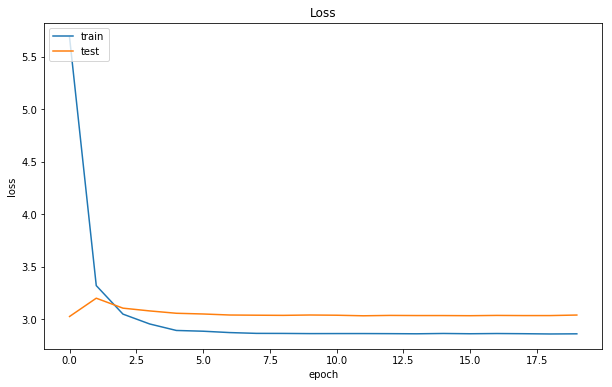

In [740]:
plt.figure(figsize=(10,6))
plt.plot(ed.history['loss'])
plt.plot(ed.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Wow....looks like some serious issues

![alt problems](https://media.giphy.com/media/3oEduRCITWQ5BruE8g/giphy.gif)

In [741]:
score = encdec_rnn_model.evaluate(tmp_x, preproc_english_sentences, verbose=0)
print("Train accurancy: ", score[1])

Train accurancy:  0.6813648600578308


In [742]:
x[10]

'பள்ளி மாணவர்கள் மற்றும் பல்கலைக்கழக மாணவர்கள் பிரான்ஸ் நெடுகிலும் நெடுஞ்சாலைகள் வீதிகள் ஆகியவற்றை தடுப்புக்களுக்கு உட்படுத்திய வகையில் நேற்று இன்னும் கூடுதலான கைதுகள் நிகழ்த்தப்பட்டன'

In [746]:
print(logits_to_text(encdec_rnn_model.predict(tmp_x[:100])[13], english_tokenizer))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


## Tuning and playing with values to see if accuracy increases

In [781]:
from keras import losses
from keras.optimizers import SGD
from keras.layers import RepeatVector
def encdec_model(input_shape, output_sequence_length, tamil_vocab_size, english_vocab_size, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(max(tamil_vocab_size, english_vocab_size) ,128 , input_length=output_sequence_length))
    model.add(LSTM(128, input_shape=input_shape[1:], return_sequences=False) )
    model.add(RepeatVector(output_sequence_length))
    model.add(LSTM(128, return_sequences=True) )
    model.add(TimeDistributed(Dense(english_vocab_size, activation='softmax') ))
    model.summary()  
    sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    return model

encdec_rnn_model = encdec_model(
    tmp_x.shape,
    preproc_english_sentences.shape[1],
    len(tamil_tokenizer.word_index)+1,
    len(english_tokenizer.word_index)+1)

if os.path.exists(os.path.join("model", "tuned.h5"))== False:
    print("train")
    ed = encdec_rnn_model.fit(tmp_x, preproc_english_sentences, batch_size=100, epochs=3 ,validation_split=0.1)
else:
    print("load")
    encdec_rnn_model = load_model(os.path.join("model", "tuned.h5"))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 74, 128)           1204736   
_________________________________________________________________
lstm_56 (LSTM)               (None, 128)               131584    
_________________________________________________________________
repeat_vector_27 (RepeatVect (None, 74, 128)           0         
_________________________________________________________________
lstm_57 (LSTM)               (None, 74, 128)           131584    
_________________________________________________________________
time_distributed_41 (TimeDis (None, 74, 5520)          712080    
Total params: 2,179,984
Trainable params: 2,179,984
Non-trainable params: 0
_________________________________________________________________
train
Train on 900 samples, validate on 100 samples
Epoch 1/3
900/900 [==============================] - 51s 57ms/step - loss: 8.610

## Accuracy still remains the same even tho loss decreases

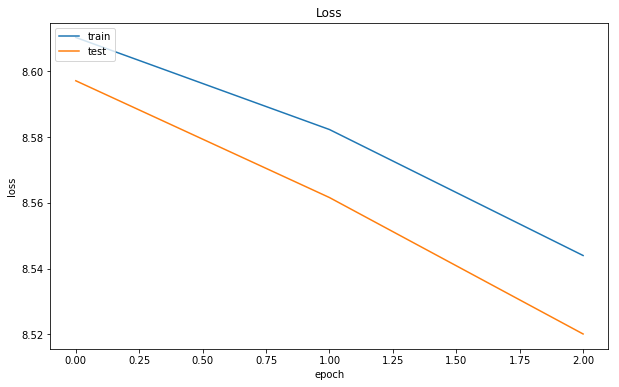

In [785]:
plt.figure(figsize=(10,6))
plt.plot(ed.history['loss'])
plt.plot(ed.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## It seems like a single layer LSTM with embeddings give the best results

In [784]:
print(logits_to_text(encdec_rnn_model.predict(tmp_x[:100])[5], english_tokenizer))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### Reference:

https://github.com/Barqawiz/aind2-nlp-capstone-translation/blob/master/machine_translation.ipynb

